In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [5]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('vision/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


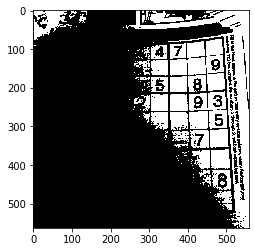

NameError: name 'cv22' is not defined

In [14]:
img = cv2.imread('vision/sudoku.jpg', 0)

_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

imshow('', binary)
t, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv22.THRESH_OUSU)
print(t)
imshow("b")

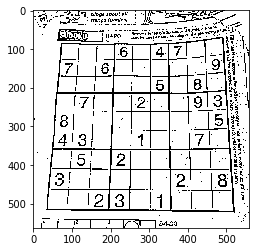

In [20]:
binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 11, 5)

imshow("", binary3)

어뎁티브는 부분적으로 조명이 되어있을 떄에만 효과적

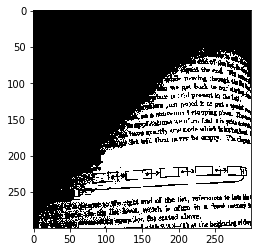

AttributeError: module 'cv2.cv2' has no attribute 'THRESH_OUSU'

In [23]:
img = cv2.imread('vision/text.jpg', 0)

_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

imshow('', binary)
t, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OUSU)
print(t)
imshow("b")

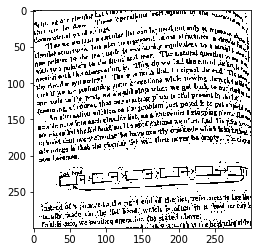

In [29]:
img = cv2.imread('vision/text.jpg', 0)

binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 11, 5)

imshow("", binary3)

Threshold는 평균이다.  

128을 기준을 나누거나  

cv2.ADAPTIVE_THRESH_GAUSSIAN_C를 쓰면 주변 픽섹=  
자기 주변을 중심으로  

가우시안을 쓴다는 것은 가우시안 분포에 따라서 가주에

값이 크다는 것은 그냥 쓰레스홀드와 유사  

쫍은 영역마다 쓰레스홀드를 진행하기 때문ㅇ ㅔ===  

5는 평균을 구해서 평균 기준으로 나누느데 평균으로 부터 약간 뺴는 것 , 스레스홀드를 기준으로  

c값으로 평균값을 왔다갔다 할 수 있다.  

영역이 균등하게 비추고 있다면 성능이 잘 나오지 않을 수 있다.  



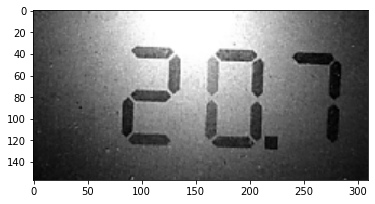

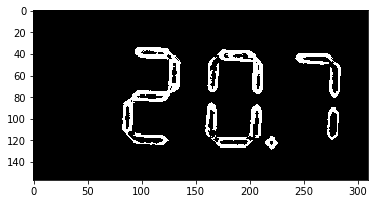

In [144]:
#207
img = cv2.imread('vision/207.png', 0)
imshow("", img)
src_bin = cv2.medianBlur(img, 11)
# src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None, iterations=1)

binary3 = cv2.adaptiveThreshold(src_bin, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 11, 5)

binary3 = 255- binary3 
# binary3 = cv2.morphologyEx(binary3, cv2.MORPH_CLOSE, None, iterations=3)

imshow("", binary3)
#circle

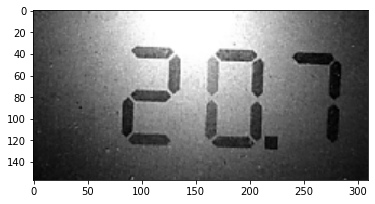

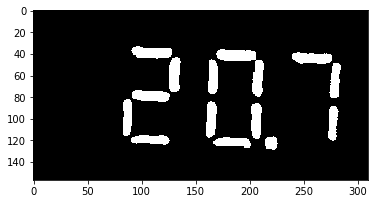

In [152]:
#207
img = cv2.imread('vision/207.png', 0)
imshow("", img)
src_bin = cv2.GaussianBlur(img, (17, 17), 0)
# src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None, iterations=1)

binary3 = cv2.adaptiveThreshold(src_bin, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY | cv2.THRESH_BINARY_INV , 21, 5)

# binary3 = cv2.morphologyEx(binary3, cv2.MORPH_CLOSE, None, iterations=3)

imshow("", binary3)

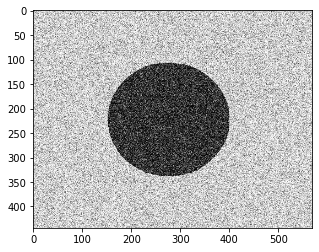

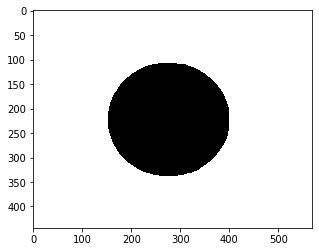

In [83]:
img = cv2.imread('vision/circle.png', 0)
imshow("", img)
_, src_bin = cv2.threshold(img, 69, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = cv2.medianBlur(src_bin, 11)
# dst1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, None)
# dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_GRADIENT, None)

# binary3 = cv2.adaptiveThreshold(dst1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                                cv2.THRESH_BINARY, 11, 5
#                                )
imshow("", src_bin)

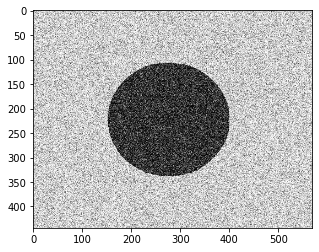

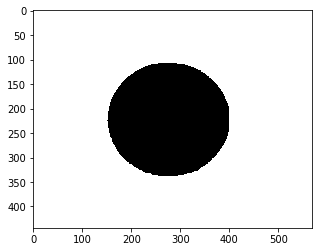

In [149]:
img = cv2.imread('vision/circle.png', 0)
imshow("", img)
src_bin = cv2.GaussianBlur(src_bin, (5,5), 0)

_, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("", src_bin)


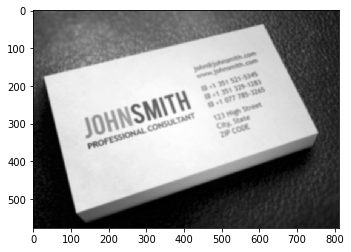

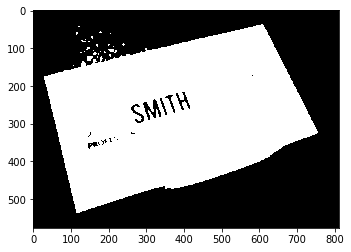

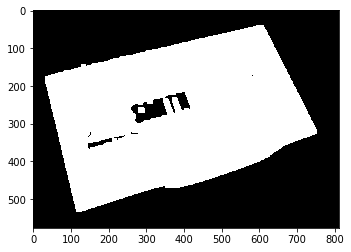

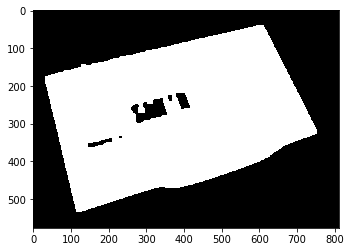

In [163]:
img = cv2.imread('vision/namecard.png', 0)
src_bin = cv2.GaussianBlur(img, (11,11), 0)
imshow("", src_bin)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow("", src_bin)

src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel, iterations=2)
imshow("", src_bin)

src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=1)

# src_bin = 255 - src_bin

imshow("", src_bin)

# 배경 제거

배경에서 current 화면을 뺄 수 있다.  
그러면 전경을 분리해낼 수 있다. 

예를 들어 CCTV 카메라는 가능하다.  



In [2]:
# cap = cv2.VideoCapture("vision/car-overhead-1.avi")  #tennis_ball.mp4  
# cap = cv2.VideoCapture("vision/tennis_ball.mp4")  #
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('mask',fgmask)
    cv2.imshow('src',frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

시간이 지남에 따라서 모델링하기 때문에 계속 있으면 사라진다.  

car overhead가 잘 나왔던 이유는 고정된 배경이 나왔기 때문  

# 연결 성분 레이블링

4연결 -> 대각선이 아닌 주변 4개만 보는 것이고  
8연결 -> 주변 8개만 따지는 것이다.  

## 2패스 -알고리즘  

## 재귀 알고리즘

1. 왼쪽 화소만이 레이블을 가지면 그 레이블을 현재 화소에 부여한다.  
2. 위쪽 화소만이 레이블을 가지면 그 레이블을 현재 화소에 부여한다.  
3. 위쪽과 왼쪽 화소가 다른 레이블을 가지면 이 사실을 등가 테이블에 기록한다.  
4. 

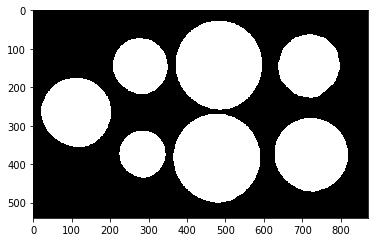

In [57]:
img  = cv2.imread("vision/coins2.png", 0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

imshow("", binary)


In [58]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

In [61]:
print(stats[3])
print(nb_components)
print(centroids)


[  208    73   143   145 16155]
8
[[416.78175217 273.26564438]
 [483.14162595 142.07584649]
 [717.09363351 143.82877183]
 [278.80439492 144.59640978]
 [112.53852511 264.75448607]
 [477.62640228 383.24306239]
 [722.99002345 374.56383239]
 [284.17938631 373.06302999]]


[416.78175217 273.26564438]
[483.14162595 142.07584649]
[717.09363351 143.82877183]
[278.80439492 144.59640978]
[112.53852511 264.75448607]
[477.62640228 383.24306239]
[722.99002345 374.56383239]
[284.17938631 373.06302999]


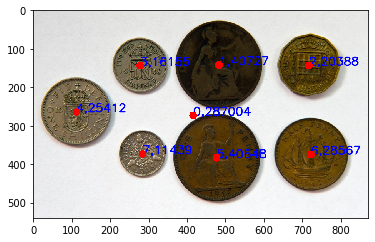

In [62]:
img  = cv2.imread("vision/coins2.png")
# centroids_ = centroids[[0,1,2,3,4,5,6,8,10]]
for c in centroids :  
    print(c)
    num = np.where(centroids ==c)[0][0]
#     print()
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # fontScale 
    fontScale = 1
    org = (int(c[0]), int(c[1]))
    # Blue color in BGR 
    color = (255, 0, 0) 
    cir = stats[num][4]
    # Line thickness of 2 px 
    thickness = 2
    text = str(num) + ',' + str(cir)
    image = cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA) 
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)

imshow("", img)    

# 영상 특징 추출

## 허프(Hough) 변환

직선을 어떻게 찾을까  

선은 우리가 보기엔 이어져서 보이는 것도 사실 에지가 연결되지 않아서 완전한 직선을 얻기는 힘들다.  

__허프 변환__  
영상 분석이나 컴퓨터 비전에서 아주 많이 사용되는 특징 추출 기법이다.  

1962년에 나옴  

y = mx + b


In [64]:
import math
src = cv2.imread('vision/building.jpg', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 160, minLineLength=50, maxLineGap=5)
#  1, math.pi / 180: 거의 안바꿈
# 160개 이상의 점이 넘어야 직선으로 본다.
# minLineLength: 최소길이 예를 들어 차선검출일 경우 어느정도 길게 하는 것
# maxLineGap: 같은위치에 너무 많은 직선이 나오지 않게 제한
# lines: 검출된 직선의 
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

In [70]:
print(type(lines))
print(lines.shape)
# 검출된 라인이 113개
print(lines[0,0,:]) # 180, 309 ~ 737, 72
print(lines[1,0,:]) # 329, 398 ~ 385, 388

<class 'numpy.ndarray'>
(113, 1, 4)
[180 309 737  72]
[329 398 385 388]


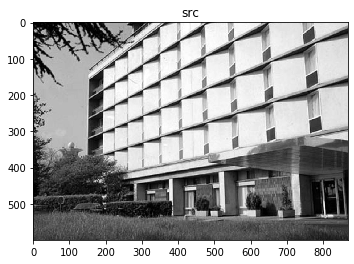

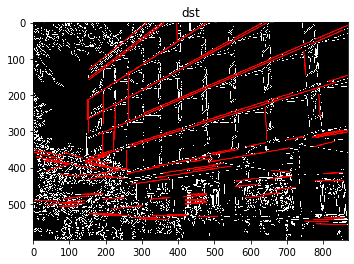

In [71]:
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA) # 라인 그리기

imshow('src', src)
imshow('dst', dst)

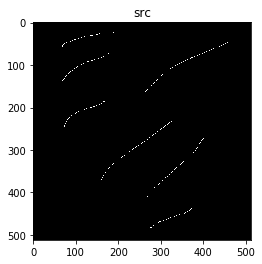

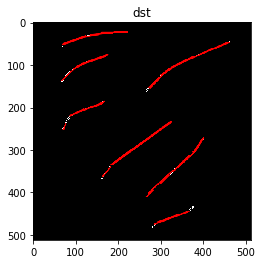

In [80]:
import math
src = cv2.imread('img/line01.png', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 20, minLineLength=10, maxLineGap=5)
#  1, math.pi / 180: 거의 안바꿈
# 160개 이상의 점이 넘어야 직선으로 본다.
# minLineLength: 최소길이 예를 들어 차선검출일 경우 어느정도 길게 하는 것
# maxLineGap: 같은위치에 너무 많은 직선이 나오지 않게 제한
# lines: 검출된 직선의 
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA) # 라인 그리기

imshow('src', src)
imshow('dst', dst)

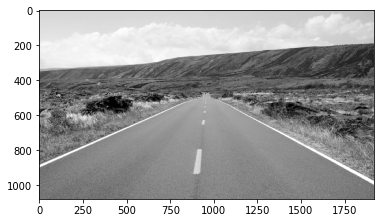

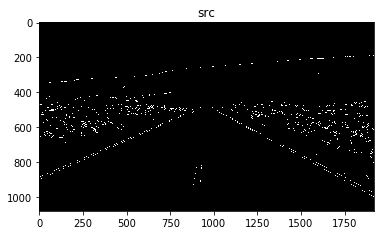

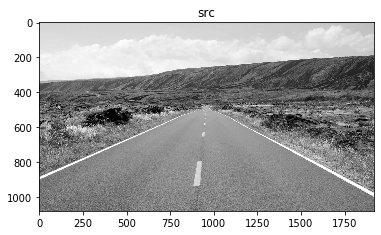

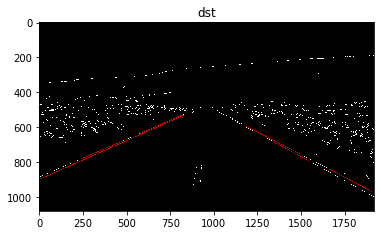

In [94]:
import math
src = cv2.imread('vision/lane.jpg', cv2.IMREAD_GRAYSCALE)

src_bin = cv2.GaussianBlur(src, (11,11), 0)
imshow("", src_bin)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
# _, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
edge = cv2.Canny(src_bin, 50, 150)
imshow('src', edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=200, maxLineGap=5)
#  1, math.pi / 180: 거의 안바꿈
# 160개 이상의 점이 넘어야 직선으로 본다.
# minLineLength: 최소길이 예를 들어 차선검출일 경우 어느정도 길게 하는 것
# maxLineGap: 같은위치에 너무 많은 직선이 나오지 않게 제한
# lines: 검출된 직선의 
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA) # 라인 그리기

imshow('src', src)
imshow('dst', dst)

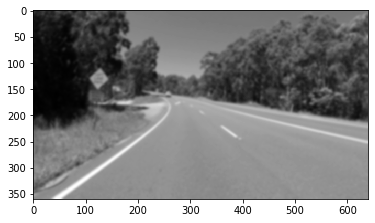

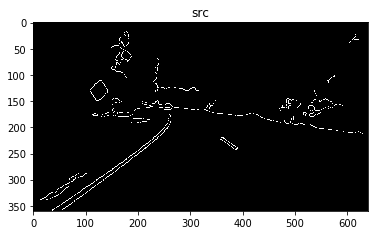

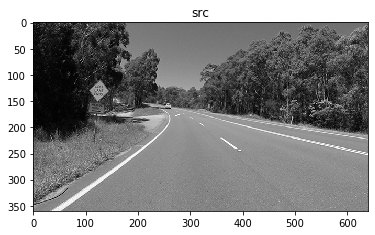

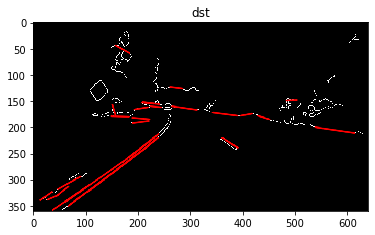

In [107]:
import math
src = cv2.imread('vision/lane01.jpg', cv2.IMREAD_GRAYSCALE)

src_bin = cv2.GaussianBlur(src, (11,11), 0)
imshow("", src_bin)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
# # _, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
edge = cv2.Canny(src_bin, 50, 150)
imshow('src', edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=20, maxLineGap=5)
# #  1, math.pi / 180: 거의 안바꿈
# # 160개 이상의 점이 넘어야 직선으로 본다.
# # minLineLength: 최소길이 예를 들어 차선검출일 경우 어느정도 길게 하는 것
# # maxLineGap: 같은위치에 너무 많은 직선이 나오지 않게 제한
# # lines: 검출된 직선의 
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA) # 라인 그리기

imshow('src', src)
imshow('dst', dst)

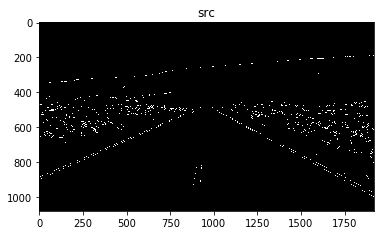

In [19]:
import math
src = cv2.imread('vision/lane.jpg', cv2.IMREAD_GRAYSCALE)

src_bin = cv2.GaussianBlur(src, (11,11), 0)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
edge = cv2.Canny(src_bin, 50, 150)

# # _, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow('src', edge)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=200, maxLineGap=5)
# #  1, math.pi / 180: 거의 안바꿈
# # 160개 이상의 점이 넘어야 직선으로 본다.
# # minLineLength: 최소길이 예를 들어 차선검출일 경우 어느정도 길게 하는 것
# # maxLineGap: 같은위치에 너무 많은 직선이 나오지 않게 제한
# # lines: 검출된 직선의 
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)





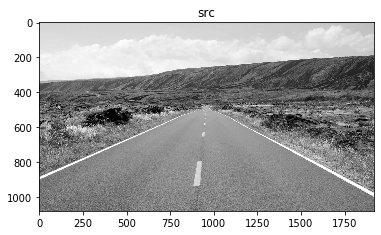

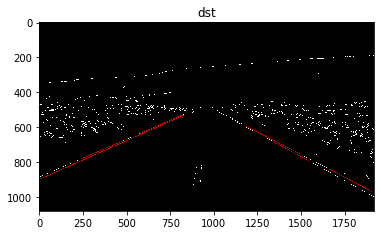

In [6]:
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA) # 라인 그리기
            
imshow('src', src)
imshow('dst', dst)

좌표를 기반으로 좌우를 나눌 수도 있다.  

위치에 무관하게 구별할 수 있는 방법은 기울기를 활용하는 방법이다.  

기울기가 유사한 직선들을 붙일 수도 있고 이상한 기울기의 직선을 거를수도있다.  


영상좌표계는 수학좌표계와 다르기 때문에 (y값이 뒤집어져있음)  

그래서 기울기도 반대로 나온다.  


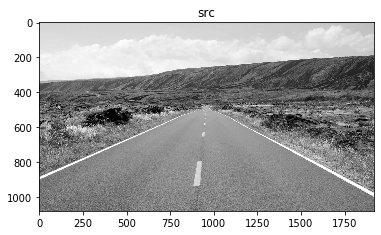

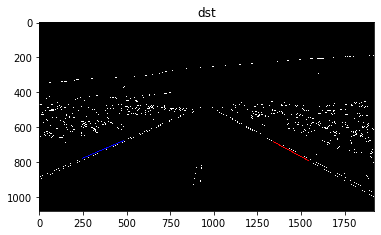

((247, 779), (483, 678))
((1341, 683), (1549, 794))


In [22]:


for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점
            pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점
            w = (pt2[1]-pt1[1]) / ( pt2[0]-pt1[0])
            if w > 0:
                rightlane = (pt1, pt2)
            else:
                leftlane =  (pt1, pt2) 

cv2.line(dst, leftlane[0], leftlane[1], (255, 0, 0), 4, cv2.LINE_AA) # 라인 그리기
cv2.line(dst, rightlane[0], rightlane[1], (0, 0, 255), 4, cv2.LINE_AA) # 라인 그리기

imshow('src', src)
imshow('dst', dst)
print(leftlane)
print(rightlane)

In [25]:
poly = []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))
print(poly)

[[247, 779], [483, 678], [1341, 683], [1549, 794]]


원본 영상과 도로 표시를 합성할때 흐릿해지는 것을 막기 위해  

원본 영상을 복사한 것에 도로표시를 하고 그것을 원본과 addWeighted 한다.  



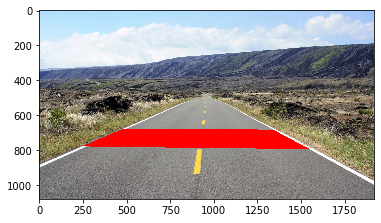

In [38]:
src = cv2.imread('vision/lane.jpg')
src_copy = src.copy()
poly = np.array(poly)
cv2.fillPoly(src_copy, [poly], (0, 0, 255))
imshow('', src_copy)

In [45]:
print(src.shape)
print(src_copy.shape)
dst2 = cv2.addWeighted(src, 0.7, src_copy, 0.3, 0.0)

(1080, 1920, 3)
(1080, 1920, 3)


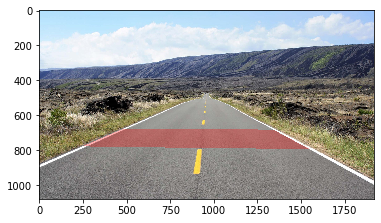

In [46]:
imshow('', dst2)

길이를 길게 만들어보기

In [90]:
rightlane = []
leftlane = []

for i in range(lines.shape[0]):
            pt1 = [lines[i][0][0], lines[i][0][1]] # 시작점
            pt2 = [lines[i][0][2], lines[i][0][3]] # 끝점
            w = (pt2[1]-pt1[1]) / ( pt2[0]-pt1[0])
            if w > 0:
                rightlane.append(pt1)
                rightlane.append(pt2)

            else:
                leftlane.append(pt1)
                leftlane.append(pt2)
                
rightlane = np.array(rightlane)
leftlane = np.array(leftlane)

print(rightlane[:, 0])
print(min(rightlane[:, 0]))

min1 = np.where(rightlane == min(rightlane[:,0]))[0][0]
print(rightlane[min1])
max1 = np.where(rightlane == max(rightlane[:,1]))[0][0]
print(rightlane[max1])

min2 = np.where(leftlane == min(leftlane[:,1]))[0][0]
print(leftlane[min2])
max2 = np.where(leftlane == max(leftlane[:,1]))[0][0]
print(leftlane[max2])

[1664 1915 1180 1493 1341 1549]
1180
[1180  592]
[1915  973]
[832 531]
[  1 899]


[[1, 899], [832, 531], [1180, 592], [1915, 973]]


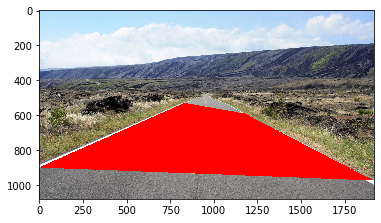

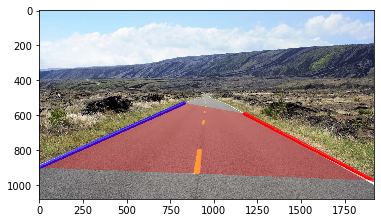

In [102]:


poly = []
poly.append(list(leftlane[max2]))
poly.append(list(leftlane[min2]))
poly.append(list(rightlane[min1]))
poly.append(list(rightlane[max1]))
print(poly)

src = cv2.imread('vision/lane.jpg')
src_copy = src.copy()
poly = np.array(poly)
cv2.fillPoly(src_copy, [poly], (0, 0, 255))
cv2.line(src, tuple(leftlane[min2]), tuple(leftlane[max2]), (255, 0, 0), 20, cv2.LINE_AA) # 라인 그리기
cv2.line(src, tuple(rightlane[min1]), tuple(rightlane[max1]), (0, 0, 255), 20, cv2.LINE_AA) # 라인 그리기
imshow('', src_copy)
dst2 = cv2.addWeighted(src, 0.7, src_copy, 0.3, 0.0)
imshow('', dst2)
